In [11]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
from datetime import datetime

from statsmodels.tsa.arima_process import ArmaProcess
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from causalimpact import CausalImpact





In [16]:
test_942_buckets = pd.read_csv("/Users/user/Downloads/business case/test_942_buckets_trimmed.csv")

In [17]:
test_942_traffic = pd.read_csv("/Users/user/Downloads/business case/test_942_traffic.csv")

In [43]:
new_df = pd.merge(test_942_buckets,test_942_traffic, left_on="path",right_on = "landing_page_path", how="inner")

In [44]:
newdf = new_df.groupby(['date','path','bucket']).sum().reset_index()

In [47]:
newdf.head()

,date,path,bucket,organic_google_sessions,organic_google_mobile_sessions,organic_google_desktop_sessions
0,2019-09-29,/jobs/lab-assistant/in-glasgow,variant,1,1,0
1,2019-09-29,/jobs/laboratory-assistant/in-edinburgh,control,1,1,0
2,2019-09-29,/jobs/laboratory-technician/in-cardiff,variant,1,1,0
3,2019-09-29,/jobs/laboratory-technician/in-dudley,variant,1,1,0
4,2019-09-29,/jobs/laboratory-technician/in-dundee,variant,1,1,0


In [56]:
df_buck = newdf.groupby(['date','bucket']).sum().unstack().reset_index()

In [60]:
pre_period = [0,99]
post_period = [100,119]

In [59]:
df_buck.loc[df_buck.date>="2020-01-07",:]

date organic_google_sessions          \
bucket                             control variant   
100     2020-01-07                    3416    3307   
101     2020-01-08                    3283    3260   
102     2020-01-09                    2951    3036   
103     2020-01-10                    2667    2726   
104     2020-01-11                    2092    2240   
105     2020-01-12                    2422    2532   
106     2020-01-13                    3697    3905   
107     2020-01-14                    3559    3716   
108     2020-01-15                    3214    3534   
109     2020-01-16                    3227    3378   
110     2020-01-17                    2569    2951   
111     2020-01-18                    1966    2069   
112     2020-01-19                    2295    2416   
113     2020-01-20                    3481    3804   
114     2020-01-21                    3531    3631   
115     2020-01-22                    3325    3590   
116     2020-01-23                    3178    3473   
117     2020-01-24                    2770    2812   
118     2020-01-25                    1986    2101   
119     2020-01-26                    2517    2438   

       organic_google_mobile_sessions         organic_google_desktop_sessions  \
bucket                        control variant                         control   
100                              2393    2308                             796   
101                              2308    2304                             732   
102                              2072    2121                             675   
103                              1934    1942                             571   
104                              1589    1699                             345   
105                              1837    1899                             408   
106                              2554    2767                             910   
107                              2487    2568                             845   
108                              2295    2520                             708   
109                              2293    2365                             713   
110                              1808    2067                             578   
111                              1475    1579                             355   
112                              1687    1794                             445   
113                              2432    2643                             816   
114                              2476    2516                             817   
115                              2386    2482                             737   
116                              2234    2439                             738   
117                              1999    2032                             624   
118                              1502    1603                             330   
119                              1877    1826                             455   

                
bucket variant  
100        782  
101        741  
102        678  
103        596  
104        381  
105        436  
106        910  
107        877  
108        759  
109        778  
110        690  
111        346  
112        434  
113        913  
114        871  
115        860  
116        794  
117        598  
118        356  
119        416

/Users/user/merit/env/lib/python3.7/site-packages/statsmodels/base/optimizer.py:23: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: standardize, nseasons. After release 0.14, this will raise.
  FutureWarning


Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    2907.3             58146.0
Prediction (s.d.)         3014.01 (22.53)    60280.14 (450.67)
95% CI                    [2968.87, 3057.2]  [59377.34, 61143.92]

Absolute effect (s.d.)    -106.71 (22.53)    -2134.14 (450.67)
95% CI                    [-149.9, -61.57]   [-2997.92, -1231.34]

Relative effect (s.d.)    -3.54% (0.75%)     -3.54% (0.75%)
95% CI                    [-4.97%, -2.04%]   [-4.97%, -2.04%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


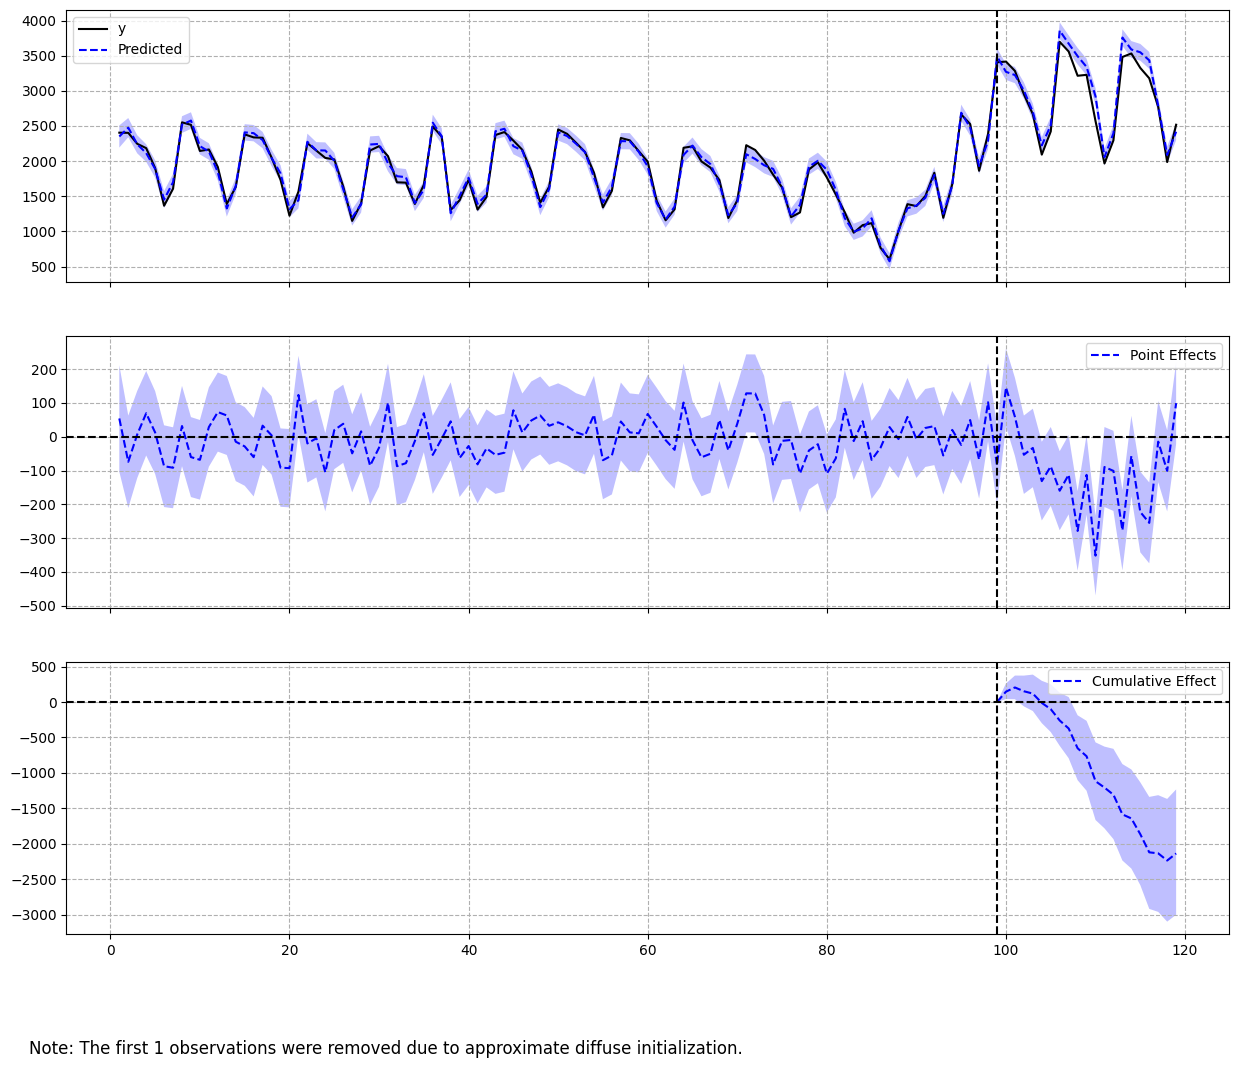

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 2907.3. By contrast, in the absence of an
intervention, we would have expected an average response of 3014.01.
The 95% interval of this counterfactual prediction is [2968.87, 3057.2].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -106.71 with a 95% interval of
[-149.9, -61.57]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 58146.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 60280.14. The 95% interval of this prediction is [59377.34, 61143.92].


The above results are given in terms of absolute numbers. In relative
terms, th

In [61]:

ci = CausalImpact(df_buck["organic_google_sessions"], pre_period, post_period)
print(ci.summary())
ci.plot()
print(ci.summary('report'))

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    2081.9             41638.0
Prediction (s.d.)         2158.52 (17.95)    43170.47 (359.06)
95% CI                    [2123.67, 2194.04] [42473.32, 43880.82]

Absolute effect (s.d.)    -76.62 (17.95)     -1532.47 (359.06)
95% CI                    [-112.14, -41.77]  [-2242.82, -835.32]

Relative effect (s.d.)    -3.55% (0.83%)     -3.55% (0.83%)
95% CI                    [-5.2%, -1.93%]    [-5.2%, -1.93%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


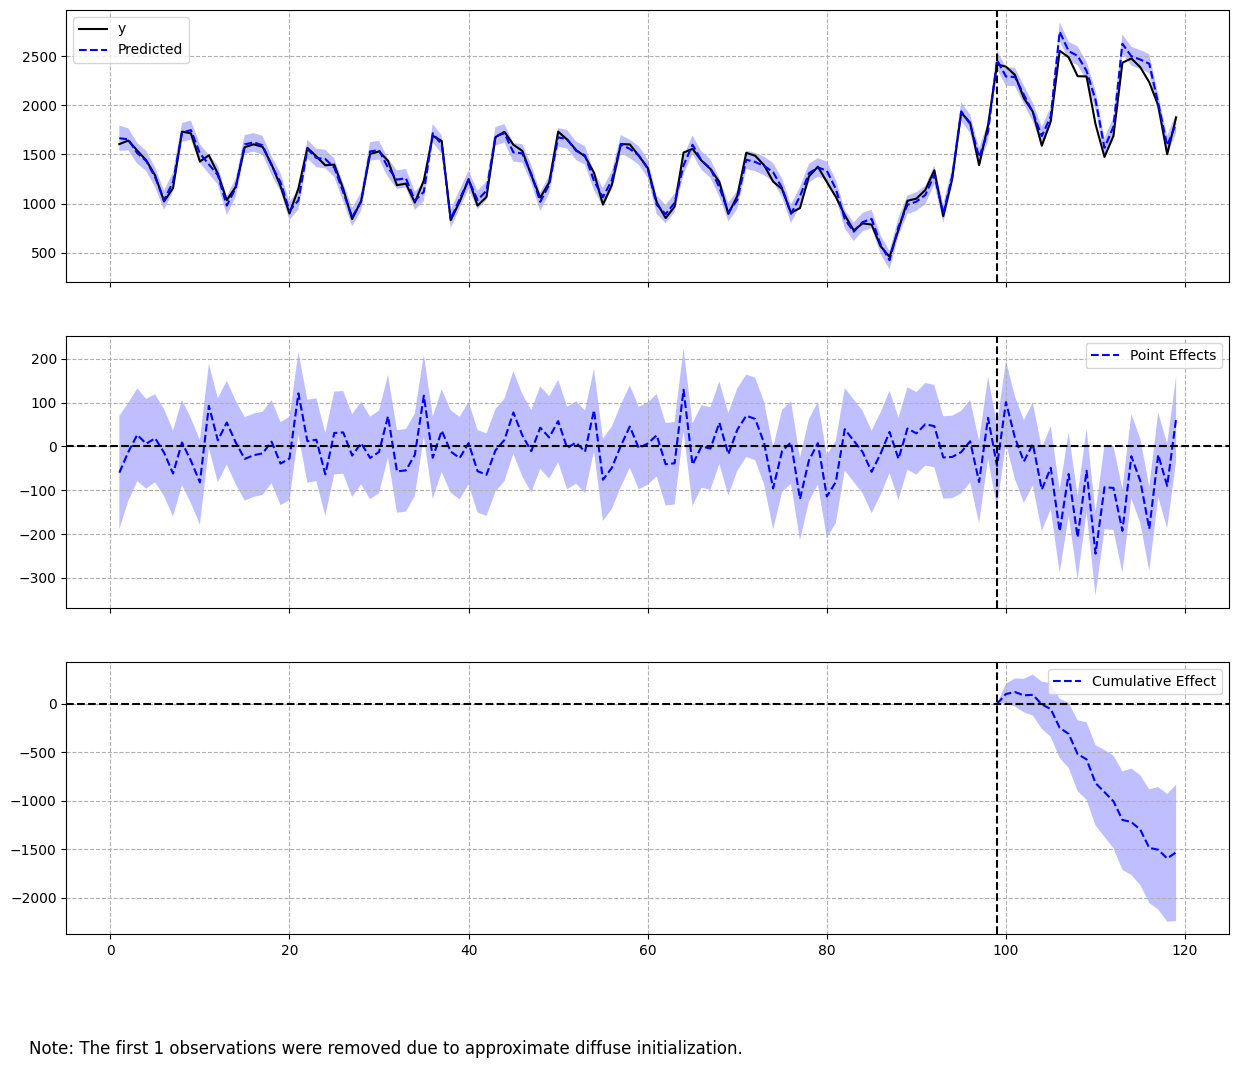

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 2081.9. By contrast, in the absence of an
intervention, we would have expected an average response of 2158.52.
The 95% interval of this counterfactual prediction is [2123.67, 2194.04].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -76.62 with a 95% interval of
[-112.14, -41.77]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 41638.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 43170.47. The 95% interval of this prediction is [42473.32, 43880.82].


The above results are given in terms of absolute numbers. In relative
terms, t

In [62]:

ci = CausalImpact(df_buck["organic_google_mobile_sessions"], pre_period, post_period)
print(ci.summary())
ci.plot()
print(ci.summary('report'))

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    629.9              12598.0
Prediction (s.d.)         647.84 (10.22)     12956.79 (204.43)
95% CI                    [627.5, 667.57]    [12550.09, 13351.43]

Absolute effect (s.d.)    -17.94 (10.22)     -358.79 (204.43)
95% CI                    [-37.67, 2.4]      [-753.43, 47.91]

Relative effect (s.d.)    -2.77% (1.58%)     -2.77% (1.58%)
95% CI                    [-5.81%, 0.37%]    [-5.81%, 0.37%]

Posterior tail-area probability p: 0.04
Posterior prob. of a causal effect: 96.3%

For more details run the command: print(impact.summary('report'))


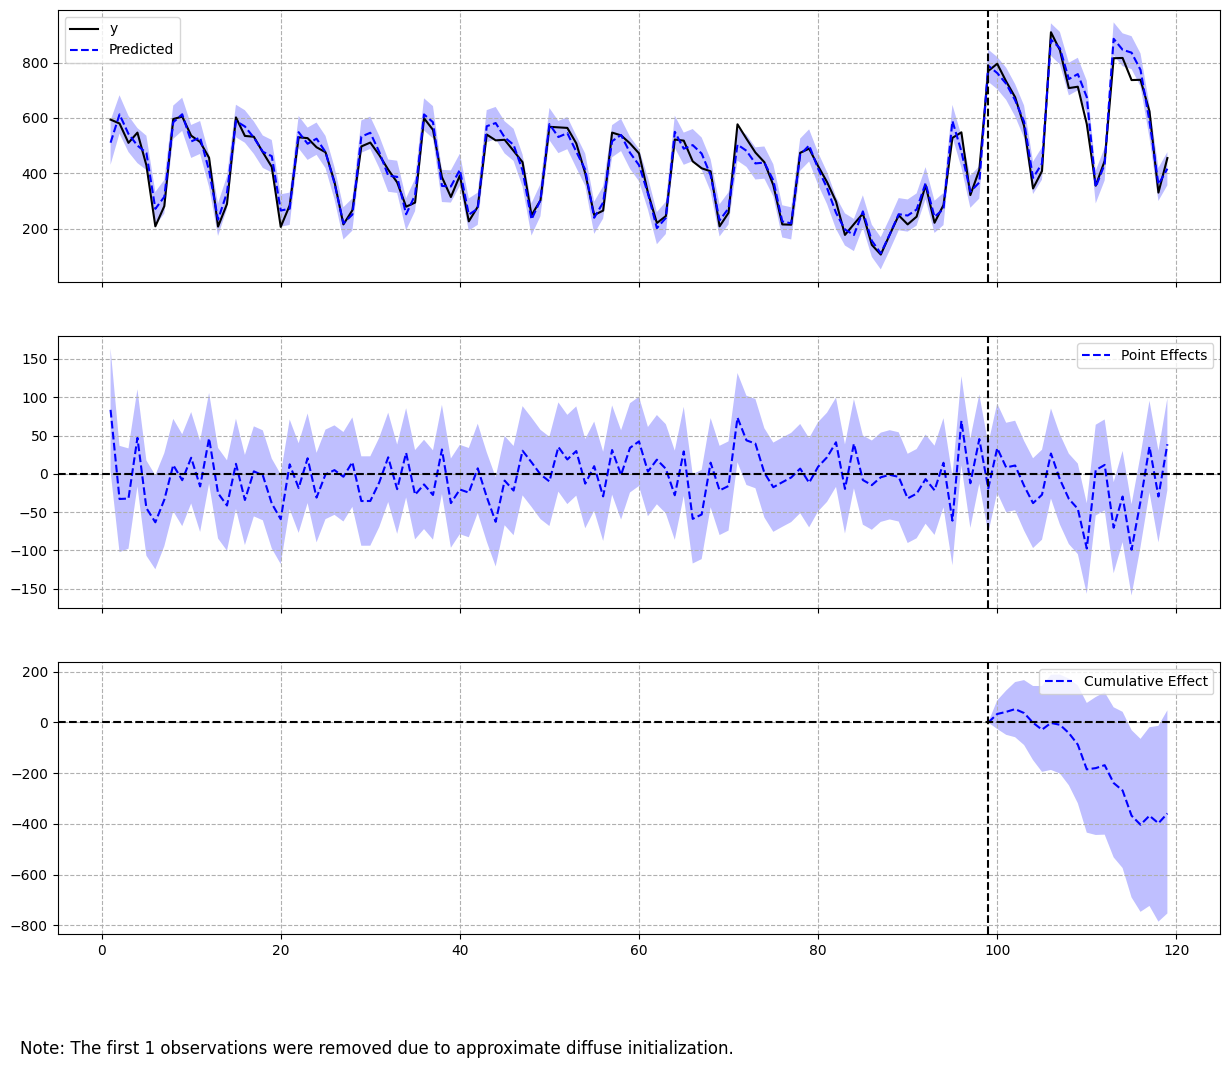

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 629.9. In the absence of an
intervention, we would have expected an average response of 647.84.
The 95% interval of this counterfactual prediction is [627.5, 667.57].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -17.94 with a 95% interval of
[-37.67, 2.4]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 12598.0.
Had the intervention not taken place, we would have expected
a sum of 12956.79. The 95% interval of this prediction is [12550.09, 13351.43].


The above results are given in terms of absolute numbers. In relative
terms, the response variable showed a decre

In [63]:

ci = CausalImpact(df_buck["organic_google_desktop_sessions"], pre_period, post_period)
print(ci.summary())
ci.plot()
print(ci.summary('report'))

 ##- Other Steps
 # Hyperparameter Tuning for Time Series Causal Impact
 # Other possible testing modelling for post and pre-intervention